In [ ]:
!pip install requests pillow requests_toolbelt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.1 MB/s eta 0:00:00


In [ ]:
!pip install roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.2/70.2 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 12.8 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully uninstalled cycler-0

In [ ]:
!pip install Pillow

loading Roboflow workspace...
loading Roboflow project...
Enter image names separated by commas: hhh.jpg,leaf5.jpg,uuu.jpeg,yyy.jpeg
Enter the path for image 'hhh.jpg': /content/hhh.jpg
Original Image Size for 'hhh.jpg': (1000, 604)
Prediction for 'hhh.jpg': {'predictions': [{'time': 0.12639394999996512, 'image': {'width': 1000, 'height': 604}, 'predictions': [{'class': 'Muntingia Calabura (Jamaica Cherry-Gasagase)', 'class_id': 1, 'confidence': 0.1258}, {'class': 'Mentha (Mint)', 'class_id': 21, 'confidence': 0.0784}, {'class': 'Hibiscus Rosa-sinensis', 'class_id': 27, 'confidence': 0.0726}, {'class': 'Ocimum Tenuiflorum (Tulsi)', 'class_id': 7, 'confidence': 0.051}, {'class': 'Azadirachta Indica (Neem)', 'class_id': 8, 'confidence': 0.0486}, {'class': 'Artocarpus Heterophyllus (Jackfruit)', 'class_id': 2, 'confidence': 0.0428}, {'class': 'Pongamia Pinnata (Indian Beech)', 'class_id': 23, 'confidence': 0.0403}, {'class': 'Ficus Religiosa (Peepal Tree)', 'class_id': 5, 'confidence': 0.

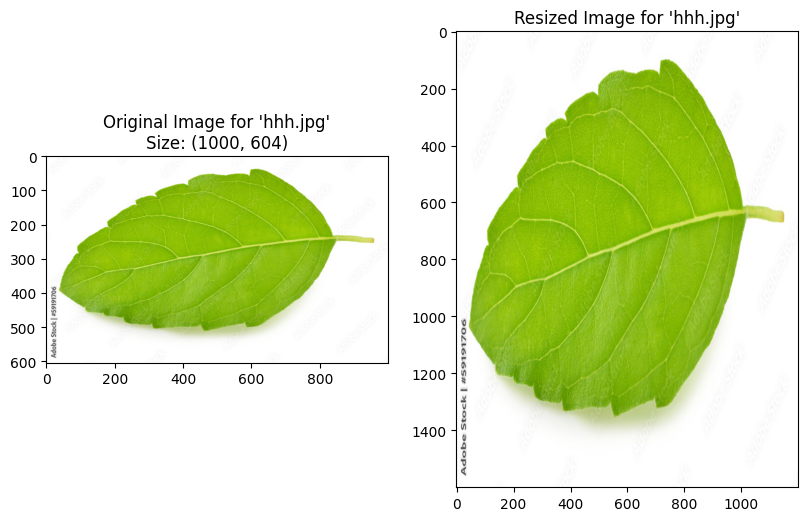

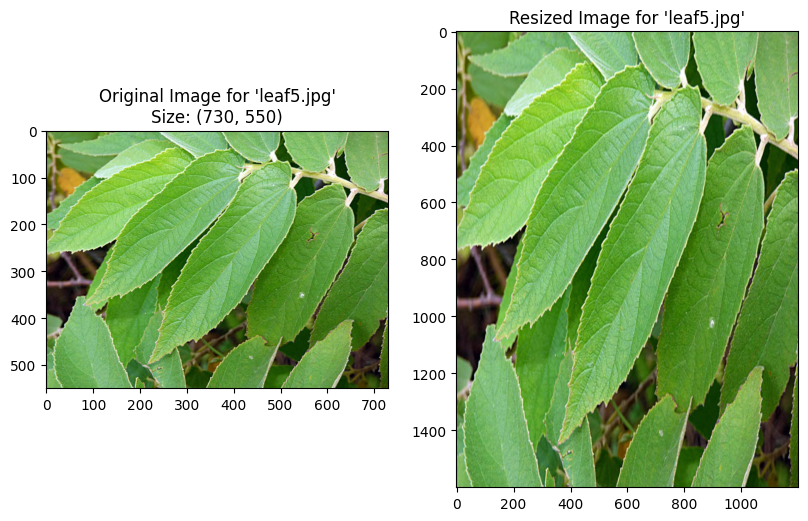

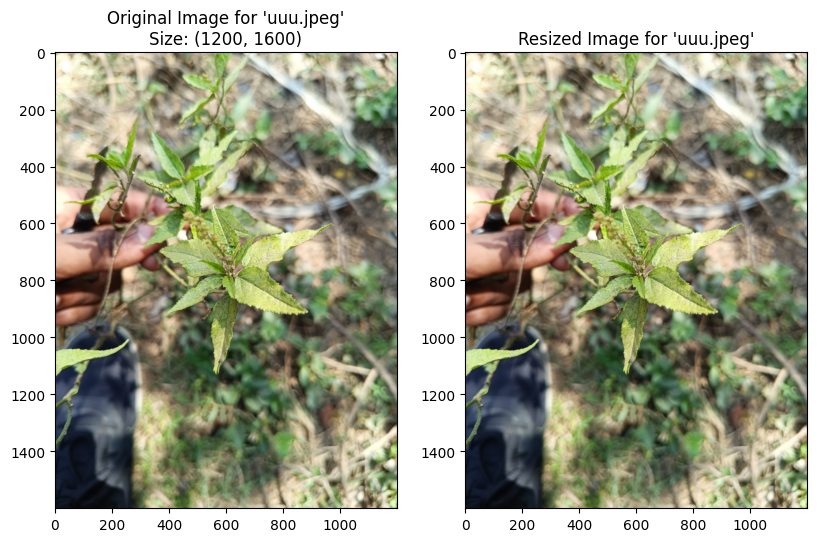

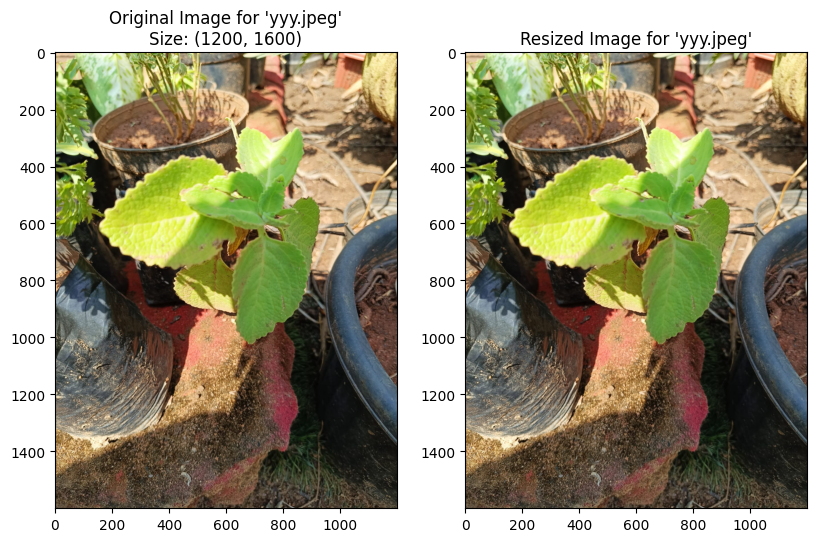

In [ ]:
from roboflow import Roboflow
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO
import requests

# Initialize Roboflow client
rf = Roboflow(api_key="aaLor3GiT5Qn68yU6UQc")

# Get the project and model
project = rf.workspace().project("img_processing-g-solutions")
model = project.version(2).model

# Get multiple image names from the user
image_names_str = input("Enter image names separated by commas: ")
image_names = [name.strip() for name in image_names_str.split(',')]

# Set the desired size
desired_size = (1200, 1600)

# Iterate through each image name
for image_name in image_names:
    # Infer on a local image
    path_1 = input(f"Enter the path for image '{image_name}': ")
    prediction = model.predict(path_1).json()

    # Load the original image using PIL
    img = Image.open(path_1)

    # Determine the size of the original image
    original_size = img.size
    print(f"Original Image Size for '{image_name}': {original_size}")

    # Resize the image using PIL
    img_resized = img.resize(desired_size)

    # Print the prediction
    print(f"Prediction for '{image_name}': {prediction}")

    # Save the resized image
    resized_path = f"resized_{image_name}.jpg"
    img_resized.save(resized_path)

    # Display the resized image using matplotlib with a larger figure size
    plt.figure(figsize=(15, 10))  # Adjust the figure size as needed

    # Display the original image with predictions
    plt.subplot(1, 3, 1)
    plt.imshow(img)
    plt.title(f"Original Image for '{image_name}'\nSize: {original_size}")

    # Display the resized image
    plt.subplot(1, 3, 2)
    plt.imshow(img_resized)
    plt.title(f"Resized Image for '{image_name}'")

    # Save the prediction as an image file
    model.predict(path_1).save(f"prediction_{image_name}.jpg")

print("Predictions completed for all images.")